# Import Basic Libaries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")

# Load Dataset

In [3]:
df_raw = pd.read_csv('new.csv', encoding='iso-8859-1', low_memory = False)
df = df_raw.copy()

In [4]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [6]:
df.describe().style.background_gradient(cmap='viridis')

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,318851.000000,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,318851.000000,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1129113334722.684570,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,63.164860,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2363446816045.193848,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,25068.506083,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1111027373683.000000,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1111027376255.000000,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,0.250000,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1111027378407.000000,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,0.333000,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1111027380579.000000,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,0.500000,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1114619720585020.000000,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,10009400.000000,1.000000,1.000000,1.000000,13.000000,183109.000000


# Check and Replace Missing Values

## Methode 1)

In [7]:
def find_missing_values(df):
    df_nan = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=True)
    df_miss = df_nan[df_nan > 0]
    return df_miss

def plot_missing_values(df_miss, figsize=(7,4)):
    fig = plt.figure(figsize=figsize)
    ax = df_miss.plot(kind='bar')
    ax.set_title('Percentage of Missing Values different from Null\n', fontsize=15)
    ax.set_xlabel('Columns Name', fontsize=13)
    ax.set_ylabel('Percentage Missing', fontsize=13)
    return None

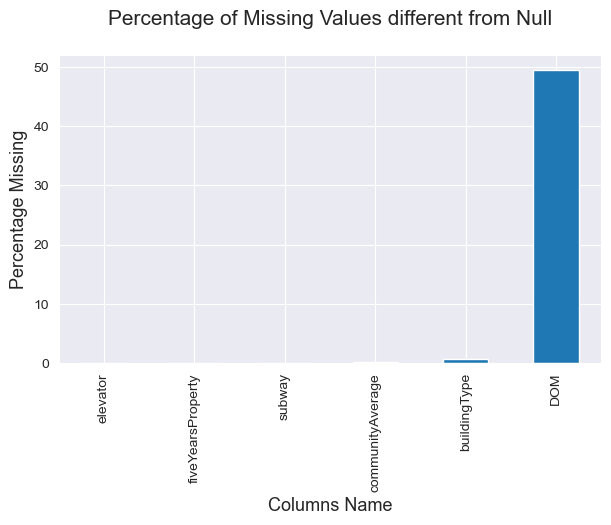

In [8]:
df_miss = find_missing_values(df)
plot_missing_values(df_miss=df_miss)

## Methode 2)

<AxesSubplot:>

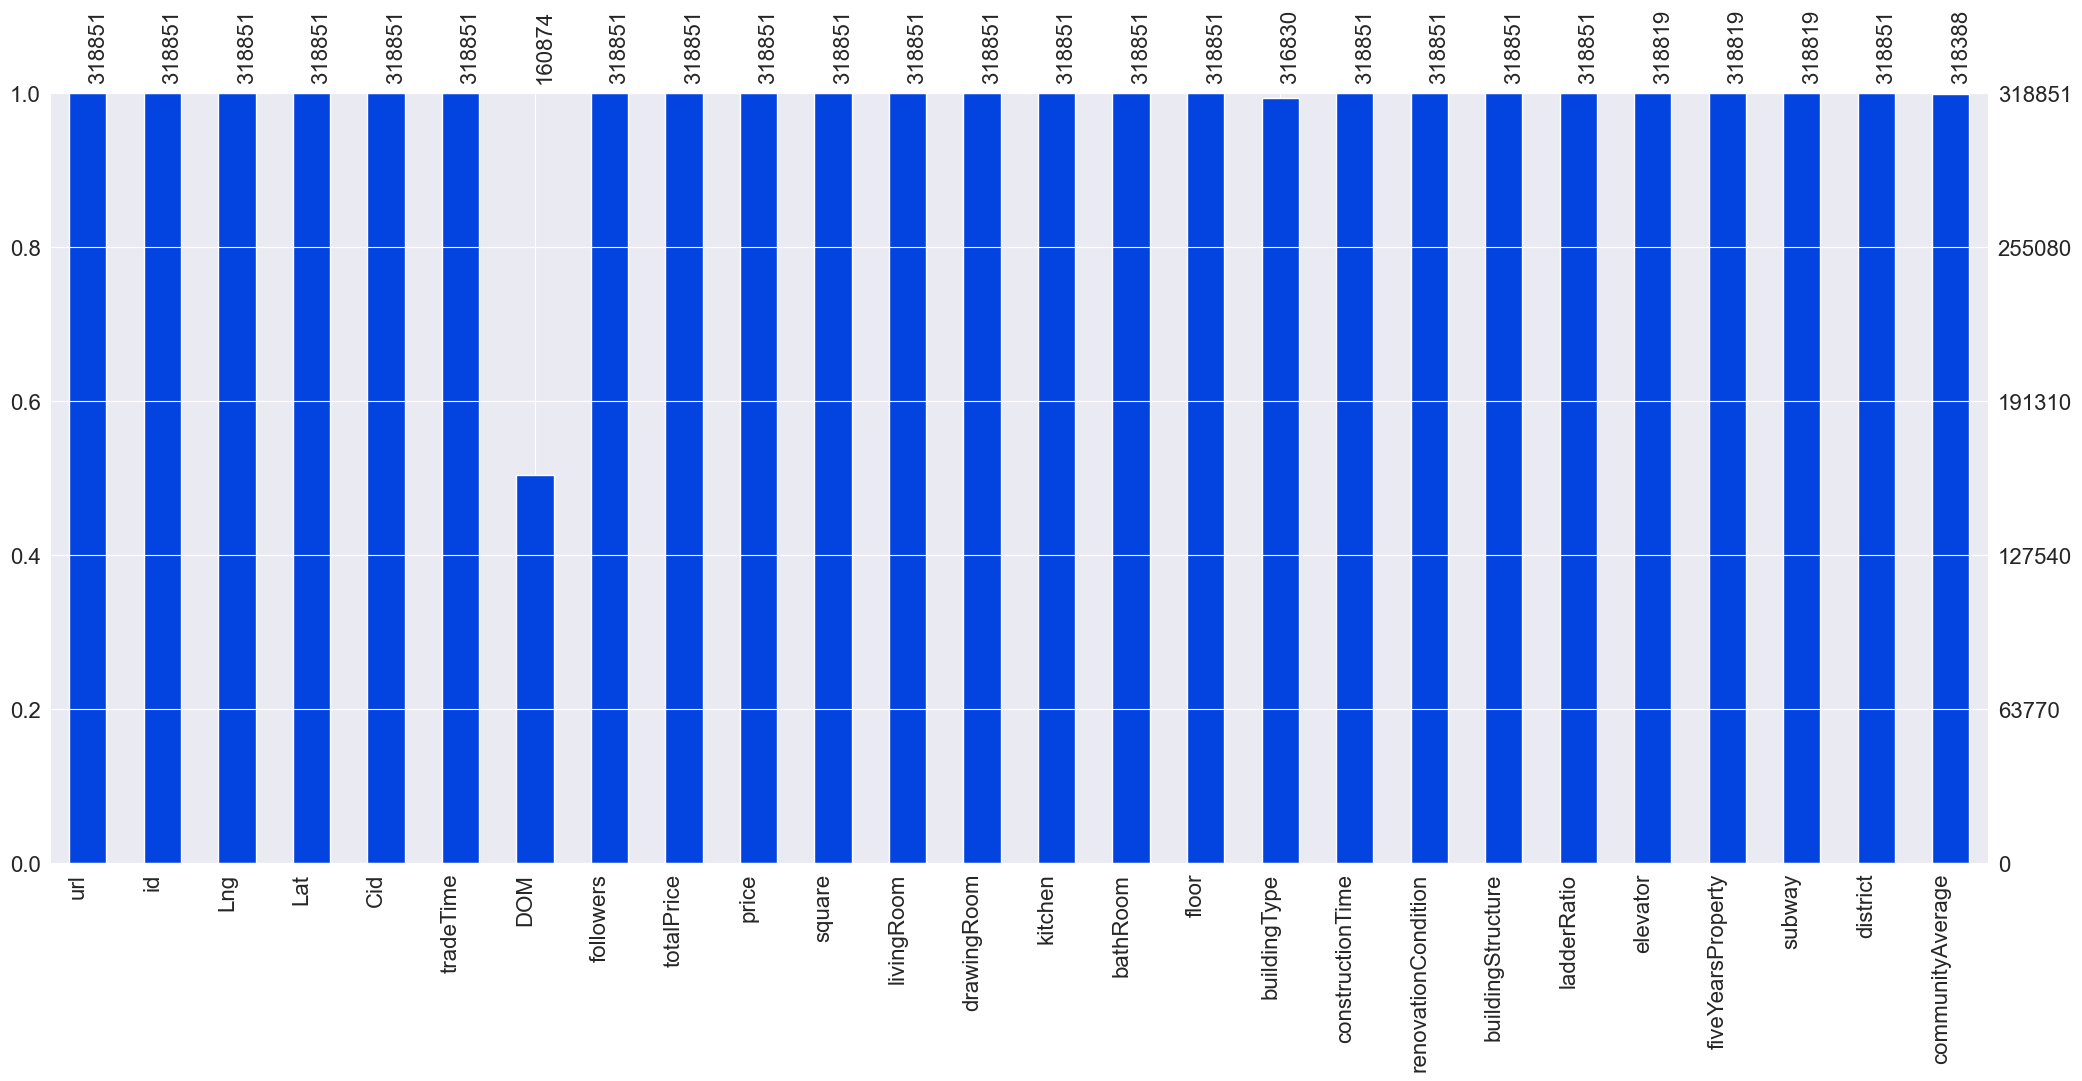

In [9]:
msno.bar(df, label_rotation=90, color='#0343DF')

In [10]:
df = df.drop(['url','id'], axis=1)

In [11]:
df.head().T

,0,1,2,3,4
Lng,116.475489,116.453917,116.561978,116.43801,116.428392
Lat,40.01952,39.881534,39.877145,40.076114,39.886229
Cid,1111027376244,1111027381879,1111040862969,1111043185817,1111027381174
tradeTime,2016-08-09,2016-07-28,2016-12-11,2016-09-30,2016-08-28
DOM,1464.0,903.0,1271.0,965.0,927.0
followers,106,126,48,138,286
totalPrice,415.0,575.0,1030.0,297.5,392.0
price,31680,43436,52021,22202,48396
square,131.0,132.38,198.0,134.0,81.0
livingRoom,2,2,3,3,2


In [12]:
df_miss

elevator              0.010036
fiveYearsProperty     0.010036
subway                0.010036
communityAverage      0.145209
buildingType          0.633838
DOM                  49.545713
dtype: float64

In [24]:
df['elevator'].value_counts(dropna=False)

1.0    184008
0.0    134843
Name: elevator, dtype: int64

In [23]:
df.loc[df[df['elevator'].isnull()].index, 'elevator'] = df['elevator'].mode()[0]

In [14]:
#df['elevator'] = df['elevator'].replace(to_replace=np.nan, value=1.0)

In [27]:
df['fiveYearsProperty'].value_counts(dropna=False)

1.0    205830
0.0    112989
NaN        32
Name: fiveYearsProperty, dtype: int64

##### Filla column 'fiveYearsProperty'

In [31]:
df.loc[df[df['fiveYearsProperty'].isnull()].index, 'fiveYearsProperty'] = df['fiveYearsProperty'].mode()[0]

#####  Fill Column 'subway'

In [33]:
df['subway'].value_counts(dropna=False)

1.0    191646
0.0    127173
NaN        32
Name: subway, dtype: int64

In [34]:
df.loc[df[df['subway'].isnull()].index, 'subway'] = df['subway'].mode()[0]

##### Fill Missing values in columns 'communityAverage'

In [36]:
df['communityAverage'].value_counts(dropna=False)

92360.0     1525
54263.0     1499
40934.0     1350
50205.0     1331
64222.0     1247
            ... 
47475.0        1
80441.0        1
36113.0        1
28381.0        1
130768.0       1
Name: communityAverage, Length: 4073, dtype: int64

In [37]:
df.loc[df[df['communityAverage'].isnull()].index, 'communityAverage'] = df['communityAverage'].mean()

##### Fill Missing values in Column 'buildingType'

In [39]:
df['buildingType'].value_counts(dropna=False)

4.000    172405
1.000     84541
3.000     59715
NaN        2021
2.000       137
0.500        15
0.333         5
0.048         4
0.125         3
0.250         2
0.429         1
0.375         1
0.667         1
Name: buildingType, dtype: int64

In [40]:
df.loc[df[df['buildingType'].isnull()].index, 'buildingType'] = df['buildingType'].mean()

##### Fill Missing values in Column 'DOM'

In [43]:
df['DOM'].value_counts(dropna=False)

NaN       157977
1.0        69162
5.0         2352
4.0         2317
3.0         2313
           ...  
637.0          1
473.0          1
452.0          1
368.0          1
1335.0         1
Name: DOM, Length: 552, dtype: int64

In [46]:
df['DOM'].median()

6.0

In [47]:
df.loc[df[df['DOM'].isnull()].index, 'DOM'] = df['DOM'].median()

In [49]:
df.isnull().sum()

Lng                    0
Lat                    0
Cid                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

# Feature Engineering

In [50]:
df = df.drop('Cid', axis=1)

In [53]:
df['tradeTime'] = pd.to_datetime(df['tradeTime']) 
df['year'] = df['tradeTime'].dt.year
df['month'] = df['tradeTime'].dt.month
df['day'] = df['tradeTime'].dt.day

In [54]:
df.head()

,Lng,Lat,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,...,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,year,month,day
0,116.475489,40.019520,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,...,6,0.217,1.0,0.0,1.0,7,56021.0,2016,8,9
1,116.453917,39.881534,2016-07-28,903.0,126,575.0,43436,132.38,2,2,...,6,0.667,1.0,1.0,0.0,7,71539.0,2016,7,28
2,116.561978,39.877145,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,...,6,0.500,1.0,0.0,0.0,7,48160.0,2016,12,11
3,116.438010,40.076114,2016-09-30,965.0,138,297.5,22202,134.00,3,1,...,6,0.273,1.0,0.0,0.0,6,51238.0,2016,9,30
4,116.428392,39.886229,2016-08-28,927.0,286,392.0,48396,81.00,2,1,...,2,0.333,0.0,1.0,1.0,1,62588.0,2016,8,28


In [56]:
df = df.drop('tradeTime', axis=1)

In [71]:
df_year_month=df.groupby(['year', 'month']).mean()['totalPrice']

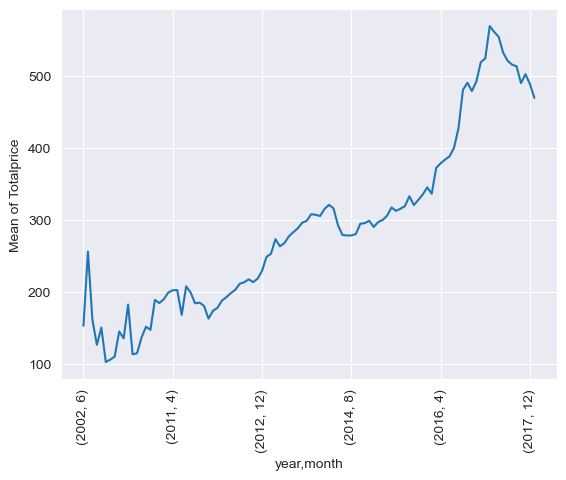

In [79]:
df_year_month.plot()
plt.xticks(rotation=90)
plt.ylabel('Mean of Totalprice')
plt.show()

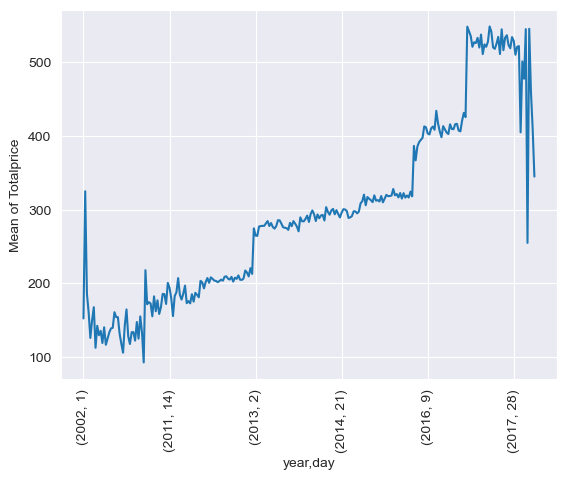

In [80]:
df_year_day=df.groupby(['year', 'day']).mean()['totalPrice']

df_year_day.plot()
plt.xticks(rotation=90)
plt.ylabel('Mean of Totalprice')
plt.show()